# ASSIGNMENT 2(PYTHON)
# Board Infinity
## Name: Raj Jadhav
## Batch: DS20AUG03

#### Context of Data: 
#### Company - UK-based and registered non-store online retail  
#### Products for selling - Mainly all-occasion gifts  
#### Customers - Most are wholesalers (local or international)  
#### Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importh The Data

In [2]:
df= pd.read_csv('F:\Board Infinity- Data Science\Python\Programme\Ecommerce  UK Retailer.csv',
                encoding='latin1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode) 

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Description and Customer Id are the key measures we cannot replace it with mean, mode or median so we drop the null record

In [8]:
df.dropna(subset=["Description"],inplace=True)

In [9]:
df.dropna(subset=["CustomerID"],inplace=True)

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## 3. Remove duplicate rows 

In [11]:
df.drop_duplicates(keep=False,inplace=True)

In [12]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


#### Duplicated Rows Removed

## 4. Remove rows which have negative values in Quantity column 

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,396767.000000,396767.000000,396767.000000
mean,12.298913,3.487053,15275.108517
std,251.781170,70.187448,1714.401947
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13919.000000
50%,5.000000,1.950000,15132.000000
75%,12.000000,3.750000,16779.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
df.drop(df[df['Quantity']<0].index,inplace=True)

In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,387923.000000,387923.00000,387923.000000
mean,13.278617,3.13463,15281.620997
std,182.690206,22.37660,1713.954340
min,1.000000,0.00000,12346.000000
25%,2.000000,1.25000,13941.000000
50%,6.000000,1.95000,15144.000000
75%,12.000000,3.75000,16788.000000
max,80995.000000,8142.75000,18287.000000


#### Negative Values Record Droped

##  5. Add the columns - Month, Day and Hour for the invoice 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387923 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    387923 non-null  object 
 1   StockCode    387923 non-null  object 
 2   Description  387923 non-null  object 
 3   Quantity     387923 non-null  int64  
 4   InvoiceDate  387923 non-null  object 
 5   UnitPrice    387923 non-null  float64
 6   CustomerID   387923 non-null  float64
 7   Country      387923 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 26.6+ MB


In [17]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387923 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    387923 non-null  object        
 1   StockCode    387923 non-null  object        
 2   Description  387923 non-null  object        
 3   Quantity     387923 non-null  int64         
 4   InvoiceDate  387923 non-null  datetime64[ns]
 5   UnitPrice    387923 non-null  float64       
 6   CustomerID   387923 non-null  float64       
 7   Country      387923 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.6+ MB


In [19]:
df["Invoice_Year"]=df['InvoiceDate'].dt.year
df["Invoice_Month"]=df['InvoiceDate'].dt.month
df["Invoice_Day"]=df['InvoiceDate'].dt.day
df['Invoice_hour']=df['InvoiceDate'].dt.hour
df['Invoice_Min']=df['InvoiceDate'].dt.minute

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_hour,Invoice_Min
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26


##  6. How many orders made by the customers? 

In [21]:
TOTAL=df.InvoiceNo.count()

In [22]:
print('Total orders made by Customers is,',TOTAL)

Total orders made by Customers is, 387923


## 7. TOP 5 customers with higher number of orders 

In [23]:
TopO=df.groupby(['CustomerID'])['InvoiceNo'].count()

In [24]:
TopO.head()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64

In [25]:
TopO=TopO.sort_values(ascending=False)

In [26]:
TopO=TopO.head()

In [27]:
TopO

CustomerID
17841.0    7523
14911.0    5667
14096.0    5111
12748.0    4243
14606.0    2654
Name: InvoiceNo, dtype: int64

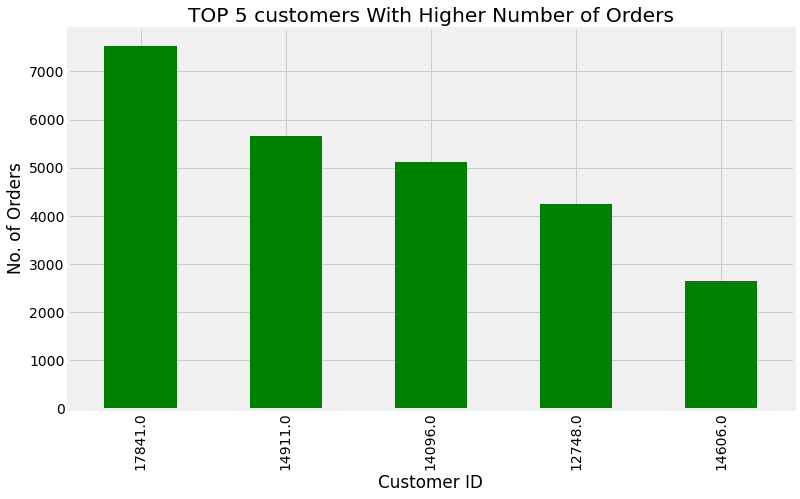

In [28]:
plt.figure(figsize=(13,7))
plt.style.use('fivethirtyeight')
TopO.plot.bar(color='g')
plt.title('TOP 5 customers With Higher Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('No. of Orders');

#### Customer ID 17841 is higher number of orders

##  8. How much money spent by the customers? 

In [29]:
df['Sales']=df['UnitPrice']*df['Quantity']

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_hour,Invoice_Min,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,20.34


In [31]:
df.shape

(387923, 14)

In [32]:
Money=df['Sales'].sum()

In [33]:
print('Total money spent by the customers:',Money)

Total money spent by the customers: 8864767.054


## 9. TOP 5 customers with highest money spent 

In [34]:
Top5=df.sort_values(by='Sales',ascending=False)

In [35]:
top5=Top5.head()

In [36]:
top5

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_hour,Invoice_Min,Sales
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011,12,9,9,15,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,10,1,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,2011,6,10,15,28,38970.00
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,2011,5,3,13,46,8142.75
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,2011,9,20,11,5,7144.72


In [37]:
top5=top5.sort_values(['Sales'],ascending=False).reset_index(drop=True)

In [38]:
top5

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_hour,Invoice_Min,Sales
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011,12,9,9,15,168469.60
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,10,1,77183.60
2,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,2011,6,10,15,28,38970.00
3,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,2011,5,3,13,46,8142.75
4,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,2011,9,20,11,5,7144.72


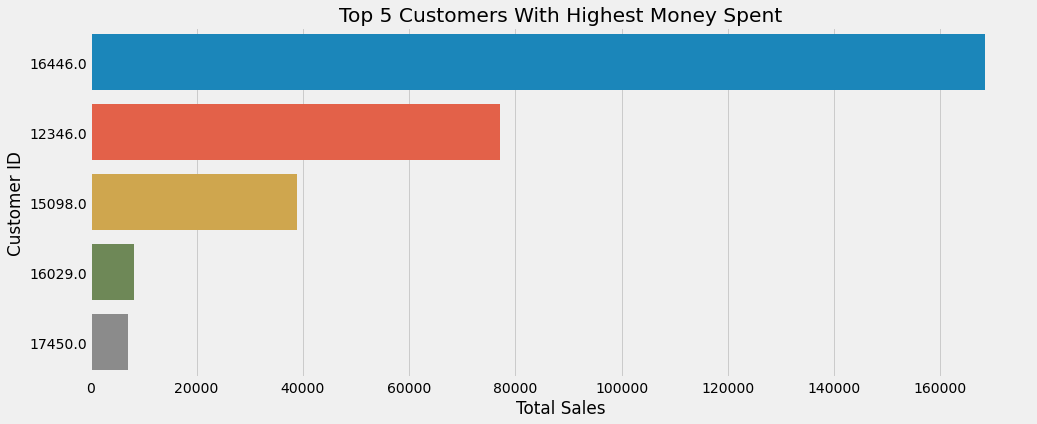

In [39]:
plt.subplots(figsize=(15,6))
plt.style.use('fivethirtyeight')
sns.barplot(x='Sales',y='CustomerID',data=top5,orient='h',order=top5.sort_values('Sales',ascending=False).CustomerID)
plt.xlabel('Total Sales')
plt.ylabel('Customer ID')
plt.title('Top 5 Customers With Highest Money Spent');

#### Customer ID 16446 spend more money 

## 10. How many orders per month?

In [40]:
OPM=df.groupby(['Invoice_Month'])['InvoiceNo'].count()

In [41]:
OPM

Invoice_Month
1     20769
2     19495
3     26592
4     22240
5     27840
6     26710
7     26344
8     26586
9     39335
10    48099
11    61914
12    41999
Name: InvoiceNo, dtype: int64

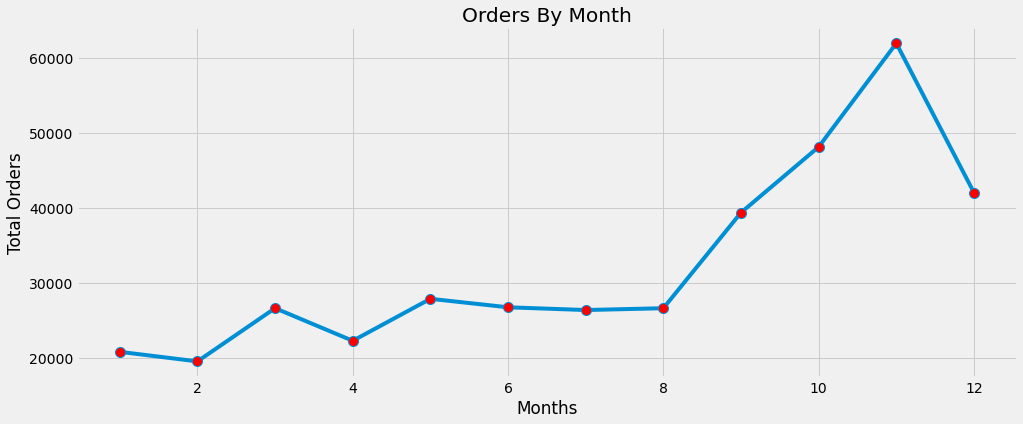

In [42]:
plt.subplots(figsize=(15,6))
plt.style.use('fivethirtyeight')
OPM.plot.line(marker='o',markerfacecolor='r',markersize=10)
plt.xlabel('Months')
plt.ylabel('Total Orders')
plt.title('Orders By Month');

#### No. of orders suddenly decreases in month of december i.e. 12

## 11. How many orders per day? 

In [43]:
OPD=df.groupby(['Invoice_Day'])['InvoiceNo'].count()

In [44]:
OPD

Invoice_Day
1     13354
2     11751
3     10585
4     14407
5     15890
6     17827
7     15265
8     15402
9     12644
10    13802
11    13072
12    10290
13    13844
14    13870
15    11189
16    12421
17    14564
18    12530
19    10587
20    14156
21    12850
22    12171
23    13913
24    11774
25    11674
26     8548
27    11983
28    13147
29     7933
30     9803
31     6677
Name: InvoiceNo, dtype: int64

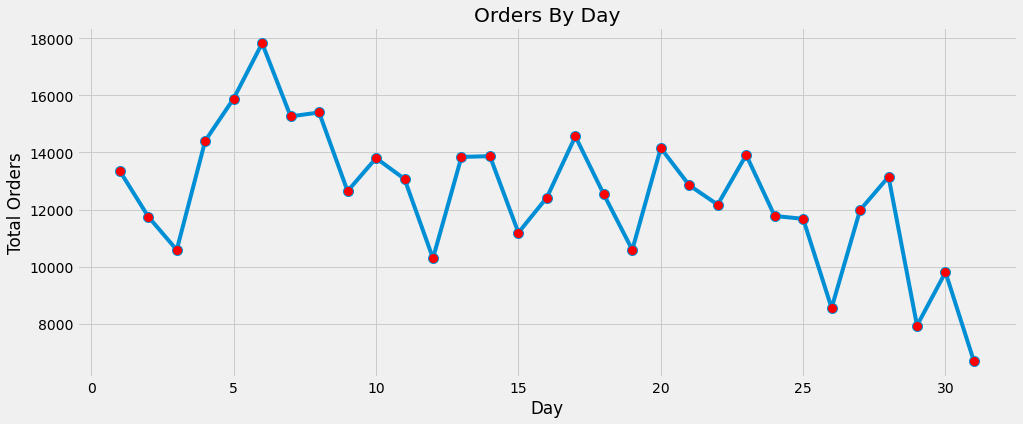

In [45]:
plt.subplots(figsize=(15,6))
plt.style.use('fivethirtyeight')
OPD.plot.line(marker='o',markerfacecolor='r',markersize=10)
plt.xlabel('Day')
plt.ylabel('Total Orders')
plt.title('Orders By Day');

#### Day 6 is highest no. of orders

##  12. How many orders per hour? 

In [46]:
OPH=df.groupby(['Invoice_hour'])['InvoiceNo'].count()

In [47]:
OPH

Invoice_hour
6         1
7       379
8      8685
9     21912
10    37569
11    47718
12    69889
13    62081
14    52465
15    44253
16    23381
17    12814
18     2867
19     3153
20      756
Name: InvoiceNo, dtype: int64

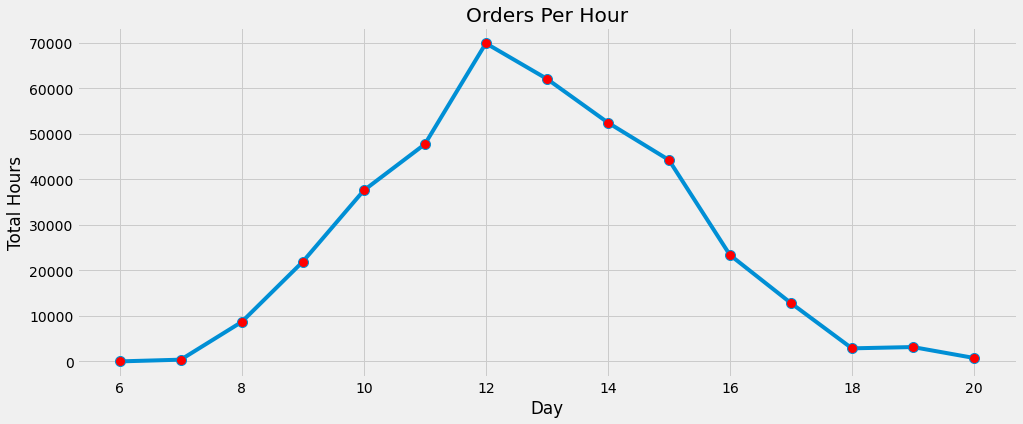

In [48]:
plt.subplots(figsize=(15,6))
plt.style.use('fivethirtyeight')
OPH.plot.line(marker='o',markerfacecolor='r',markersize=10)
plt.xlabel('Day')
plt.ylabel('Total Hours')
plt.title('Orders Per Hour');

#### Orders increses gradually upto 12 after that orders gradually decreases

##  13. How many orders for each country? 

In [49]:
OBC=df.groupby(['Country'])['InvoiceNo'].count()

In [50]:
OBC=OBC.sort_values()

In [51]:
OBC

Country
Saudi Arabia                 9
Bahrain                     17
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Unspecified                238
Israel                     242
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Sweden                     449
Cyprus                     593
Finland                    685
Channel Islands            746
Italy                      758
Norway                    1072
Australia                 1183
Portugal                  1445
Switzerland               1842
Belgium                   2031
Netherlands               2363


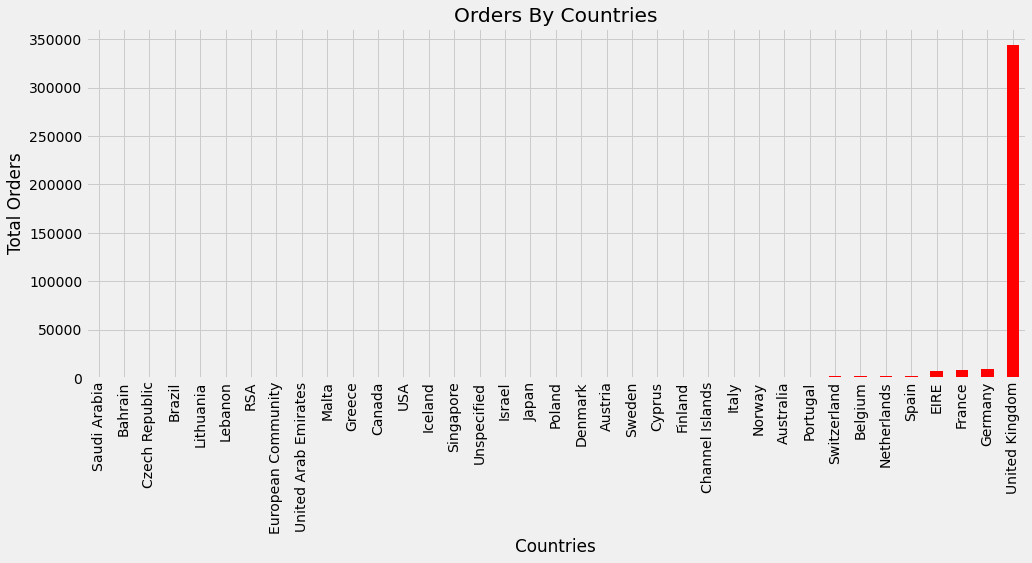

In [52]:
plt.subplots(figsize=(15,6))
plt.style.use('fivethirtyeight')
OBC.plot.bar(color='r')
plt.xlabel('Countries')
plt.ylabel('Total Orders')
plt.title('Orders By Countries');

#### If we talk about more number of orders United Kingdom is one sided winner

##  14. Orders trend across months 

In [53]:
orders_trend=df.groupby(['Invoice_Month'])['InvoiceNo'].count()

In [54]:
orders_trend

Invoice_Month
1     20769
2     19495
3     26592
4     22240
5     27840
6     26710
7     26344
8     26586
9     39335
10    48099
11    61914
12    41999
Name: InvoiceNo, dtype: int64

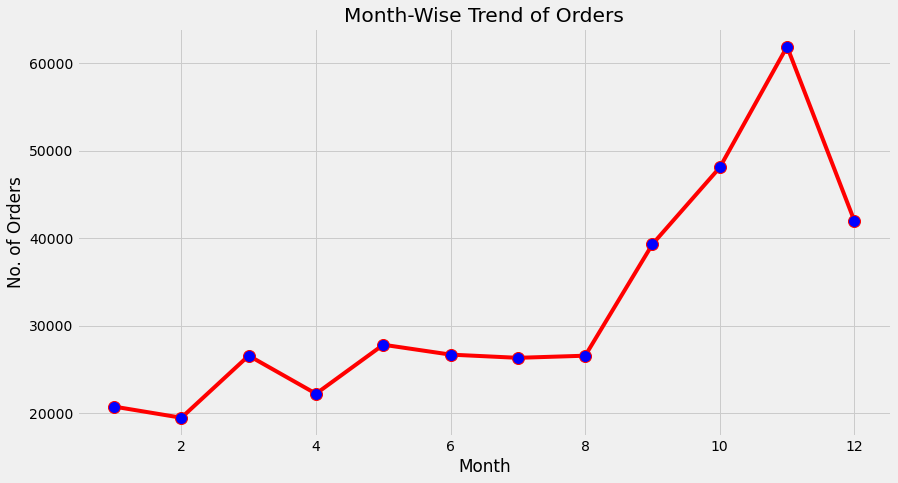

In [55]:
plt.figure(figsize=(13,7))
plt.style.use('fivethirtyeight')
orders_trend.plot.line(color='r',marker='o',markerfacecolor='b',markersize=12)
plt.title('Month-Wise Trend of Orders')
plt.xlabel('Month')
plt.ylabel('No. of Orders');

#### No. of orders suddenly decreases in month of december i.e. 12

##  15. How much money spent by each country? 

In [56]:
CS=df.groupby(['Country'])['Sales'].sum()

In [57]:
CS

Country
Australia               1.383863e+05
Austria                 1.019868e+04
Bahrain                 5.484000e+02
Belgium                 4.119634e+04
Brazil                  1.143600e+03
Canada                  3.666380e+03
Channel Islands         2.043064e+04
Cyprus                  1.341947e+04
Czech Republic          8.267400e+02
Denmark                 1.895534e+04
EIRE                    2.649790e+05
European Community      1.300250e+03
Finland                 2.254608e+04
France                  2.088446e+05
Germany                 2.284897e+05
Greece                  4.760520e+03
Iceland                 4.310000e+03
Israel                  7.209990e+03
Italy                   1.748324e+04
Japan                   3.741637e+04
Lebanon                 1.693880e+03
Lithuania               1.661060e+03
Malta                   2.725590e+03
Netherlands             2.854463e+05
Norway                  3.616544e+04
Poland                  7.334650e+03
Portugal                3.3314

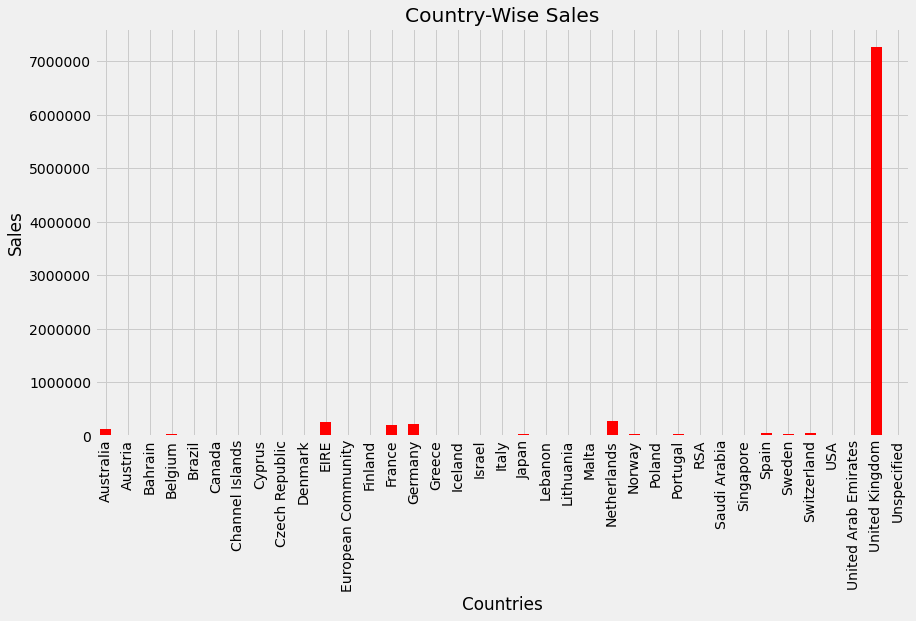

In [58]:
plt.figure(figsize=(13,7))
plt.style.use('fivethirtyeight')
CS.plot.bar(color='r')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Country-Wise Sales')
plt.xlabel('Countries')
plt.ylabel('Sales');

#### United Kingdome is one sided winner if we talk about money spent 

## END